In [93]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

In [52]:
data = pd.read_csv("data.csv")
data["week"] = pd.to_datetime(data["week"])

In [53]:
data

,week,volume
0,2022-10-31,0.33
1,2022-11-07,0.47
2,2022-11-14,0.32
3,2022-11-21,1.69
4,2022-11-28,1.23
...,...,...
145,2025-08-11,13.60
146,2025-08-18,15.20
147,2025-08-25,16.24
148,2025-09-01,13.43


- Decomposição entre tendência e sazonalidade
- Ajuste
- Métricas e métodos de avaliação
- Resíduos

## Decomposição da série

In [54]:
data_series = data.set_index("week")["volume"]
data_series

week
2022-10-31     0.33
2022-11-07     0.47
2022-11-14     0.32
2022-11-21     1.69
2022-11-28     1.23
              ...  
2025-08-11    13.60
2025-08-18    15.20
2025-08-25    16.24
2025-09-01    13.43
2025-09-08    16.59
Name: volume, Length: 150, dtype: float64

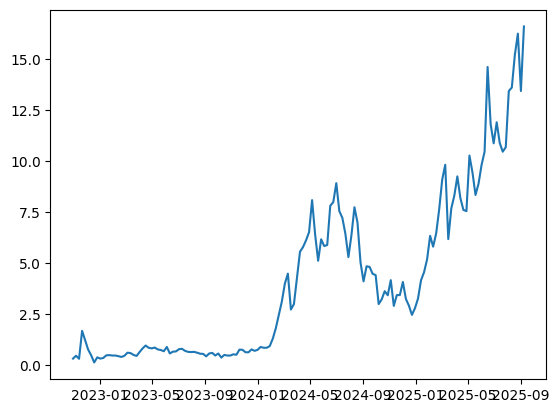

In [55]:
plt.plot(data_series)
plt.show()

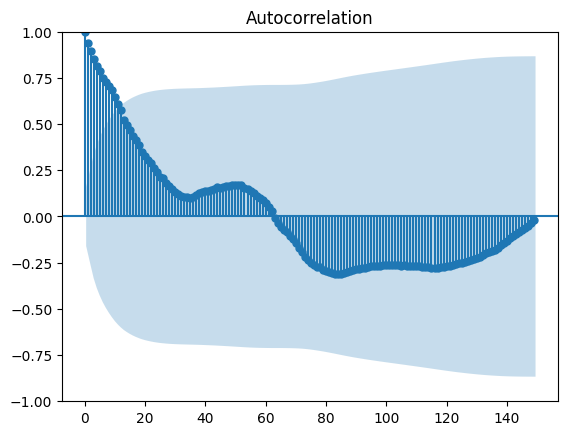

In [90]:
plot_acf(data_series, lags = 149)
plt.show()

Não há evidência de sazonalidade, mas há forte evidência de tendência.

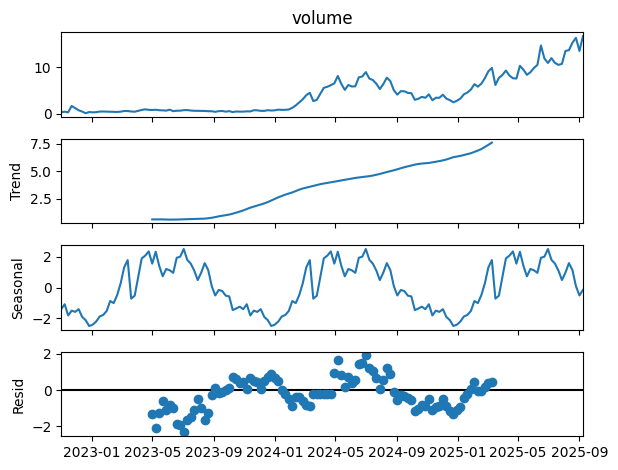

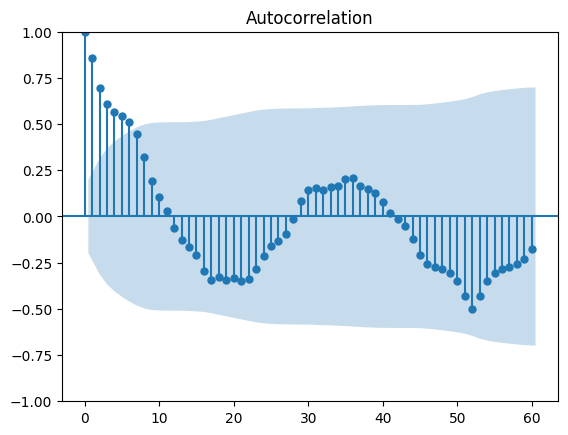

In [118]:
decomposition = seasonal_decompose(data_series, model = "additive", period = 52)

decomposition.plot()
plt.show()

residuals = decomposition.resid.values
residuals = residuals[~np.isnan(residuals)]

plot_acf(residuals, lags = 60)
plt.show()

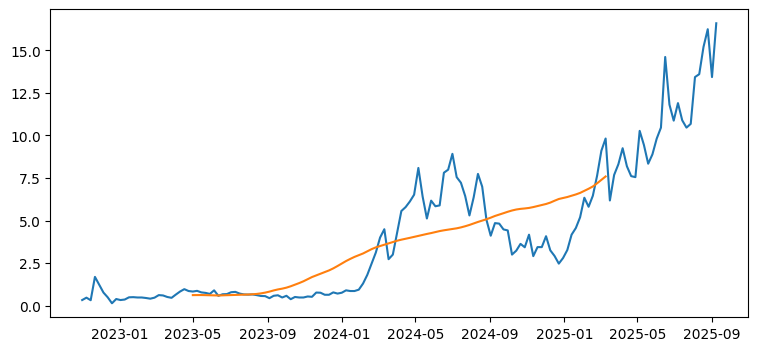

In [134]:
plt.figure(figsize = (9, 4))
plt.plot(data_series)
plt.plot(data_series - decomposition.resid - decomposition.seasonal)

In [129]:
time_covariate = np.arange(len(data_series))

X = sm.add_constant(time_covariate)
y = data_series - decomposition.seasonal

ols_model = sm.OLS(y, X).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     435.9
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           5.86e-46
Time:                        17:26:21   Log-Likelihood:                -302.87
No. Observations:                 150   AIC:                             609.7
Df Residuals:                     148   BIC:                             615.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2981      0.298     -4.354      0.0

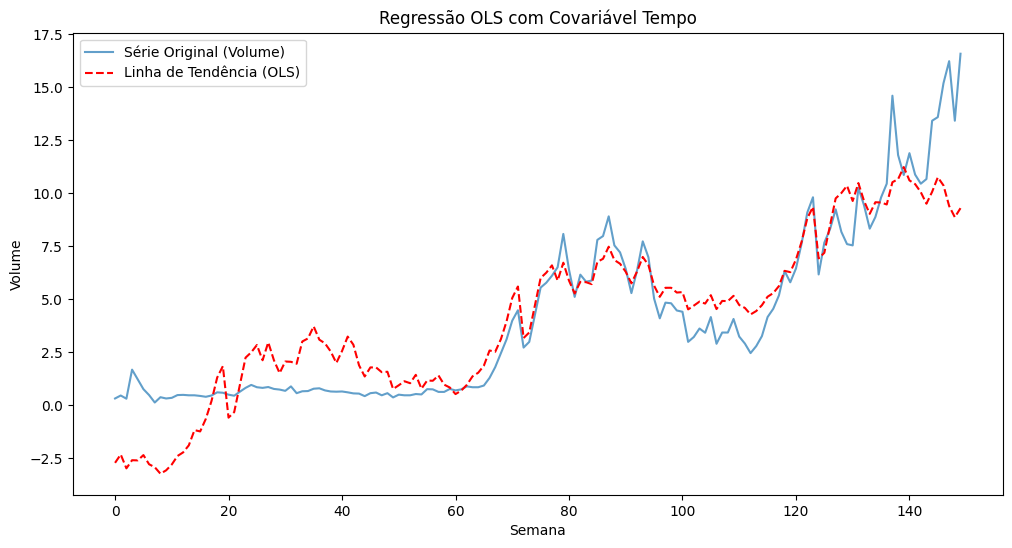

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['volume'], label='Série Original (Volume)', alpha=0.7)
plt.plot(data.index, ols_model.predict(X) + decomposition.seasonal, color='red', linestyle='--', label='Linha de Tendência (OLS)')
plt.title('Regressão OLS com Covariável Tempo')
plt.xlabel('Semana')
plt.ylabel('Volume')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

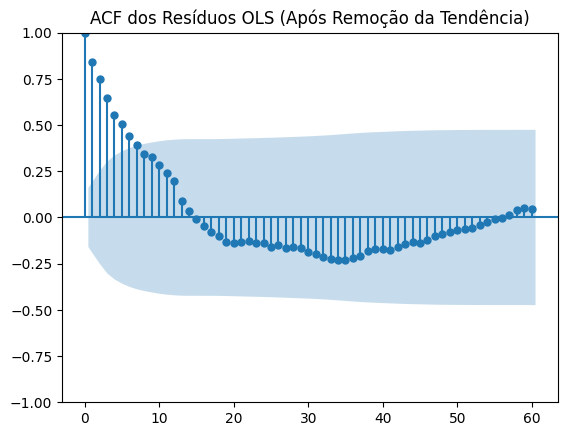

In [138]:
residuals = ols_model.resid
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=60)
plt.title('ACF dos Resíduos OLS (Após Remoção da Tendência)')
plt.show()

Text(0, 0.5, 'Residuals')

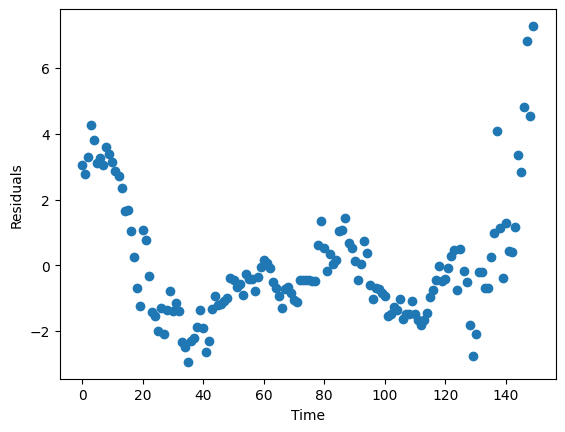

In [139]:
plt.scatter(time_covariate, ols_model.resid)
plt.xlabel("Time")
plt.ylabel("Residuals")